# <center>CMPBIO210, IB120, IB201
# <center>"Introduction to Quantitative Methods in Biology"
# <center>Lecture 8. ODE Model of Cell Cycle regulation
## <center>Denis Titov

**The goal of this jupyter notebook is to discuss how to intruduce phase portrait and nonlinear dynamics and to formulate, solve and analyze ODE model of cell cycle**

Optional additional resources:  
https://www.cell.com/action/showPdf?pii=S0092-8674%2811%2900243-1  
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1993813/

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sym
from scipy.integrate import solve_ivp

## Simplest model of Cell Cycle with just Cdk and APC
  
Desired property of the model:
- Stable oscillations that are independent of initial conditions  
- Use mechanistic info about the existance of cell cycle signaling components Cyclin, Cdk, APC, etc
  
Assumtions of the model:
- $CyclinCdk$ is produced at uniform rate $k_1$ independent of $CyclinCdk$ concentration
- $APC$ can exist as an active (we'll refer to it as just $APC^{Active}$) and inactive form (we'll refer to it as $APC^{Inactive}$) and $APC^{Total}$ is the combined concentration of $APC^{Active}$ and $APC^{Inactive}$  
- $CyclinCdk$ converts $APC^{Inactive}$ to $APC^{Active}$ through phosphorylation at a rate $k_3 \cdot CyclinCdk \cdot APC^{Inactive}$
- $APC^{Active}$ gets inactivated at a rate $k_4 \cdot APC^{Active}$  
- $APC^{Active}$ inactivates $CyclinCdk$ at a rate $k_2 \cdot CyclinCdk \cdot APC^{Active}$. Molecular mechanism of this is that Cyclin part of CyclinCdk is degraded by the proteosome as APC is a ubiquitin-ligase.
  
The model is then:  

$\frac{dCyclinCdk}{dt}=k_1 - k_2 \cdot CyclinCdk \cdot APC^{Active}$  
  
$\frac{dAPC^{Active}}{dt}=k_3 \cdot CyclinCdk \cdot APC^{Inactive} - k_4 \cdot APC^{Active}$

$\frac{dAPC^{Inactive}}{dt}= - k_3 \cdot CyclinCdk \cdot APC^{Inactive} + k_4 \cdot APC^{Active}$

$APC^{Total}= APC^{Active} + APC^{Inactive}$  
  
We can simplify the equations above because equations for $\frac{dAPC^{Active}}{dt}$ and $\frac{dAPC^{Inactive}}{dt}$ are really the same equation given that $APC^{Inactive}=APC^{Total} - APC^{Active}$ so we can eliminate one of them without loosing any information. And for convenience lets also set $APC^{Total}=1$ and rename $APC^{Active}$ into just $APC$.  
  
The model is then:  
  
$\frac{dCyclinCdk}{dt}=k_1 - k_2 \cdot CyclinCdk \cdot APC$  
  
$\frac{dAPC}{dt}=k_3 \cdot CyclinCdk \cdot (1-APC) - k_4 \cdot APC$  



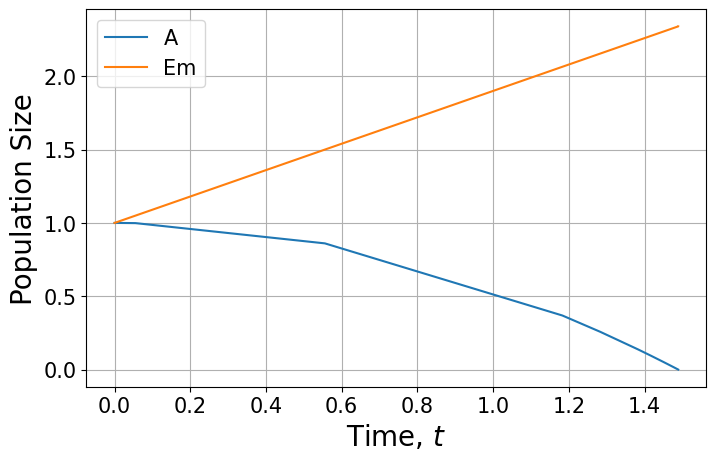

In [10]:
K_L = 1e-6
K_B = 1.25e-6
Vmax_R = 1
Vmax_B = 0.1
k1 = 1
k2 = 1e-3
L = 1


def Chemotaxis(t, y):
    A, Em = y
    dA_dt = k1 * L * (1 - A) - k2 * A
    dEm_dt = Vmax_R - Vmax_B * A / (K_B + A)
    return [dA_dt, dEm_dt]


initial_condition = [1, 1]
tspan = [0, 1000]
soln = solve_ivp(Chemotaxis, tspan, initial_condition, atol=1e-10, rtol=1e-10)

plt.figure(figsize=(8, 5), dpi=100)
plt.plot(soln.t, soln.y[0], label="A")
# plt.plot(soln.t, soln.y[1], label="Em")
plt.xlabel("Time, $t$", fontsize=20)
plt.ylabel("Population Size", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()
plt.legend(fontsize=15);